In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


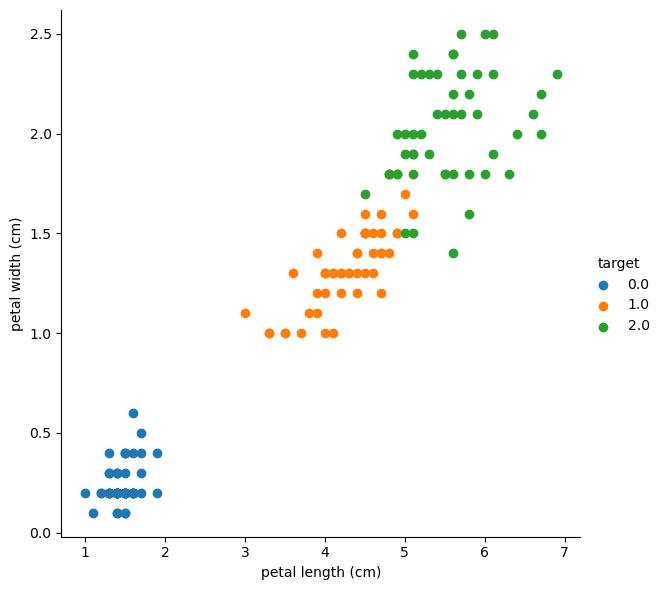

In [4]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize the model
forest = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(iris.data, iris.target)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation score:  0.9733333333333334


In [6]:
param_grid = {
    'n_estimators': [10, 20, 30, 50, 100], 
    'max_depth': [15, 20, 25], 
    'min_samples_split': [2, 3, 4, 5], 
    'min_samples_leaf': [1, 2, 3, 4],    
    'criterion': ['gini', 'entropy']  
}

forest = RandomForestClassifier()

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(iris.data, iris.target)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  0.9666666666666668


In [7]:
forest = RandomForestClassifier(criterion='gini',n_estimators=1, max_depth=10)

forest.fit(iris.data, iris.target)
forest.score(iris.data, iris.target)

0.9933333333333333

In [8]:
forest2 = RandomForestClassifier(criterion='gini', max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50)

forest2.fit(iris.data, iris.target)
forest2.score(iris.data, iris.target)

0.9866666666666667

In [9]:
forest3 = RandomForestClassifier(criterion='gini', max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

forest3.fit(iris.data, iris.target)
forest3.score(iris.data, iris.target)

1.0

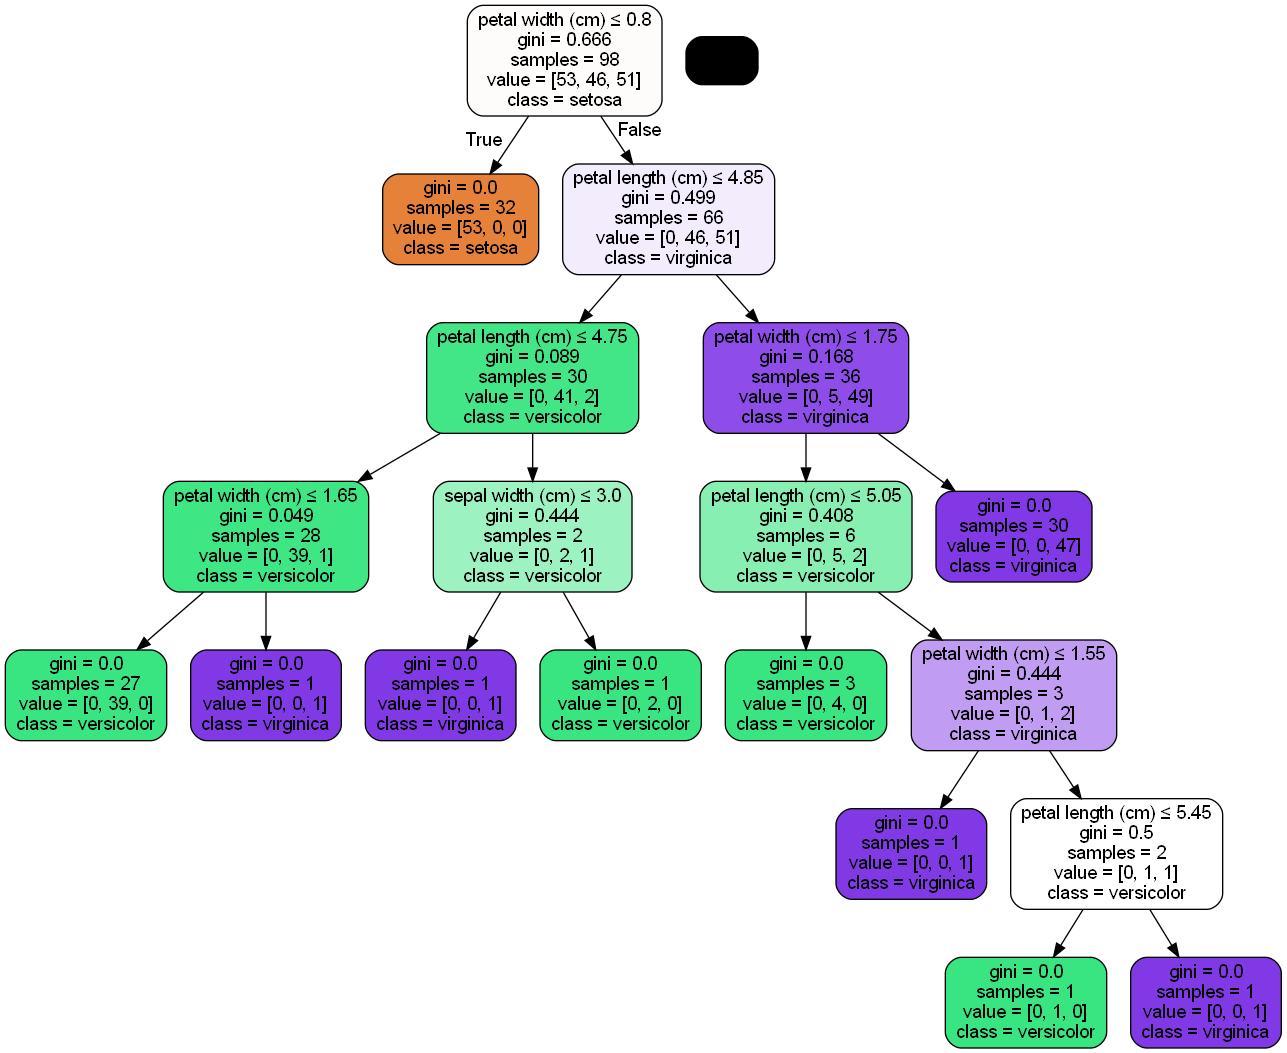

In [17]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tree = forest3.estimators_[1]


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True,
                )

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())



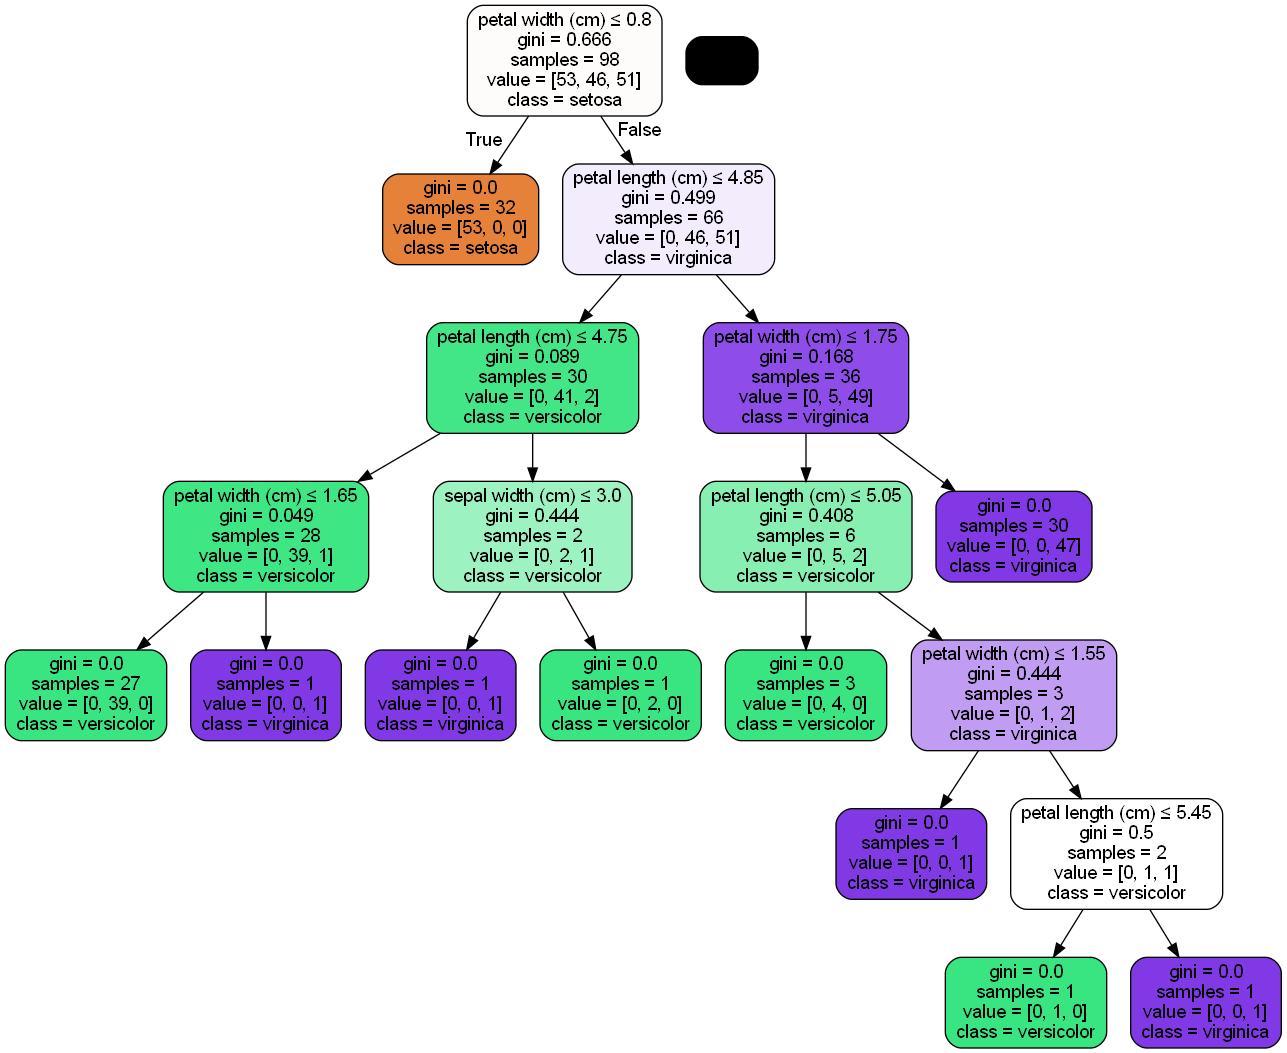

In [11]:
# Extract the single tree from the Random Forest
tree = forest3.estimators_[1]

# Visualize the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True)

# Create the graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph
Image(graph.create_png())

In [52]:
expected = iris.target
predicted = forest3.predict(iris.data)

predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
